In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

For today's lab, we will explore a real world dataset - Singapore HDB resale prices and see if we can build a linear regression model that is able to predict a flat's resale price. Remember to look through the data dictionary to understand the data attributes https://data.gov.sg/dataset/resale-flat-prices

In [2]:
hdb = pd.read_csv('data/hdb/resale-flat-prices-based-on-registration-date-from-jan-2015-onwards.csv')

### 1. How many rows and columns does the dataset have?

In [3]:
hdb.shape

(59809, 11)

### 2. What is the outcome / dependent variable we are trying to predict?

In [4]:
hdb.columns

Index(['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date',
       'remaining_lease', 'resale_price'],
      dtype='object')

#### Resale price

#### We will apply some basic transformations to create additional columns which will be useful for our model 

- **apply**: applies a function on the dataframe
- **lambda**: python anonymous function syntax, alternative to defining and creating a function separately

In [5]:
hdb = hdb.rename(columns={'month': 'year-month'})
hdb['year'] = hdb['year-month'].apply(lambda x: int(x.split("-")[0]))
hdb['month'] = hdb['year-month'].apply(lambda x: int(x.split("-")[1]))
hdb['lower_storey_bound'] = hdb['storey_range'].apply(lambda x: int(x.split()[0]))
hdb['upper_storey_bound'] = hdb['storey_range'].apply(lambda x: int(x.split()[2]))

In [6]:
hdb.head()

,year-month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,year,month,lower_storey_bound,upper_storey_bound
0,2015-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,07 TO 09,60.0,Improved,1986,70,255000.0,2015,1,7,9
1,2015-01,ANG MO KIO,3 ROOM,541,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1981,65,275000.0,2015,1,1,3
2,2015-01,ANG MO KIO,3 ROOM,163,ANG MO KIO AVE 4,01 TO 03,69.0,New Generation,1980,64,285000.0,2015,1,1,3
3,2015-01,ANG MO KIO,3 ROOM,446,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1979,63,290000.0,2015,1,1,3
4,2015-01,ANG MO KIO,3 ROOM,557,ANG MO KIO AVE 10,07 TO 09,68.0,New Generation,1980,64,290000.0,2015,1,7,9


### 3. Plot the distribution of resale prices using the distplot function from the seaborn (sns) library

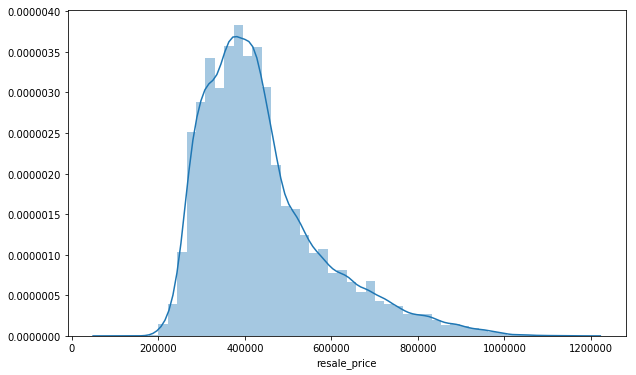

In [7]:
plt.figure(figsize=(10,6))
sns.distplot(hdb["resale_price"])
plt.show()

### 4. Use the describe function to obtain descriptive statistics about resale price i.e. mean, 50th percentile

In [8]:
hdb["resale_price"].describe()

count    5.980900e+04
mean     4.394339e+05
std      1.415803e+05
min      9.050000e+04
25%      3.400000e+05
50%      4.100000e+05
75%      5.000000e+05
max      1.180000e+06
Name: resale_price, dtype: float64

### 5. Create a scatter plot of resale_price and floor_area_sqm using the pairplot function from Seaborn and include a regression line

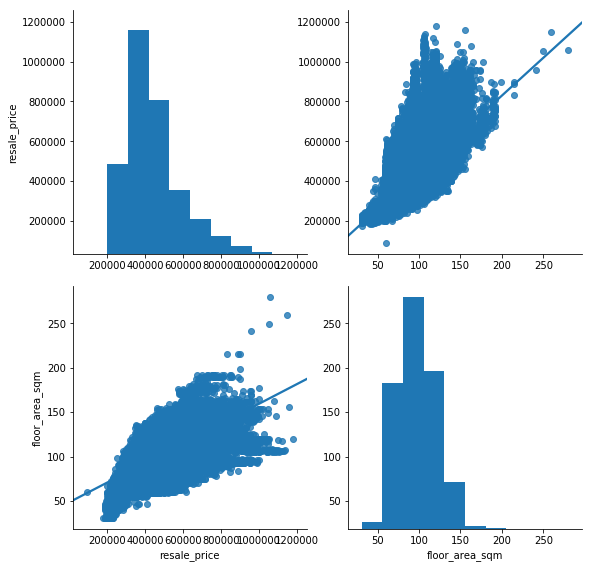

In [9]:
sns.pairplot(hdb[["resale_price", "floor_area_sqm"]], kind="reg", size=4)

There looks to be a strong linear correlation between floor_area_sqm and resale_price

### 6. Using Scikit Learn create a Linear Regression Model to predict resale_price based on floor_area_sqm. What are the coefficients of the model?

In [10]:
feature_cols = ['floor_area_sqm']
X = hdb[feature_cols]
y = hdb["resale_price"]

model1 = LinearRegression().fit(X, y)
# print the coefficients
print(model1.intercept_)
print(model1.coef_)

69670.34735546925
[3799.49236349]


### 7. Let's include a more quantitative variables into the model. Compute the correlations between floor_area_sqm, lower_storey_bound, upper_storey_bound, remaining_lease, and resale_price 

In [11]:
hdb[["floor_area_sqm", "lower_storey_bound", "upper_storey_bound", "remaining_lease", "resale_price"]].corr()

,floor_area_sqm,lower_storey_bound,upper_storey_bound,remaining_lease,resale_price
floor_area_sqm,1.000000,0.043150,0.043150,0.353459,0.648536
lower_storey_bound,0.043150,1.000000,1.000000,0.272584,0.378199
upper_storey_bound,0.043150,1.000000,1.000000,0.272584,0.378199
remaining_lease,0.353459,0.272584,0.272584,1.000000,0.355297
resale_price,0.648536,0.378199,0.378199,0.355297,1.000000


### 8. Using the heatmap function from the Seaborn library, display the correlation matrix as a heatmap 

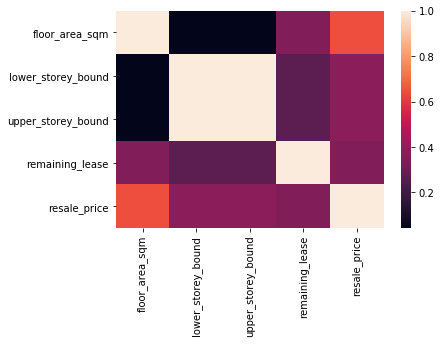

In [12]:
sns.heatmap(hdb[["floor_area_sqm", "lower_storey_bound", "upper_storey_bound", "remaining_lease", "resale_price"]].corr())

Notice the presence of multicollinearity (high correlation between the lower and upper storey bounds). This is a trivial example as we derived both of these columns from the same original column but serves as a reminder about the importance of checking the correlations between variables before we include them in the model construction

### 9. Create a multi-variate Linear Regression Model including the variables floor_area_sqm, upper_storey_bound and remaining_lease to determine resale_prices

In [13]:
factors = ['floor_area_sqm', 'upper_storey_bound', 'remaining_lease']
y = hdb["resale_price"]
X = hdb[factors]
model2 = LinearRegression().fit(X, y)

In [14]:
# print the coefficients
print(model2.intercept_)
print(model2.coef_)

-35619.517841434164
[3622.06731257 8712.29519563  555.53283776]


### 10. Let's use this model to predict the prices of new BTO flats

In [15]:
new_release = pd.DataFrame({'upper_storey_bound': [12, 5], 'floor_area_sqm': [100, 120], 'remaining_lease': [5, 5]})

In [16]:
model2.predict(new_release)

array([376815.08344644, 445367.69983348])

### 11. Intuitively, the area of the flat i.e. town should have an association with the flat_price, let's explore this association 

/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


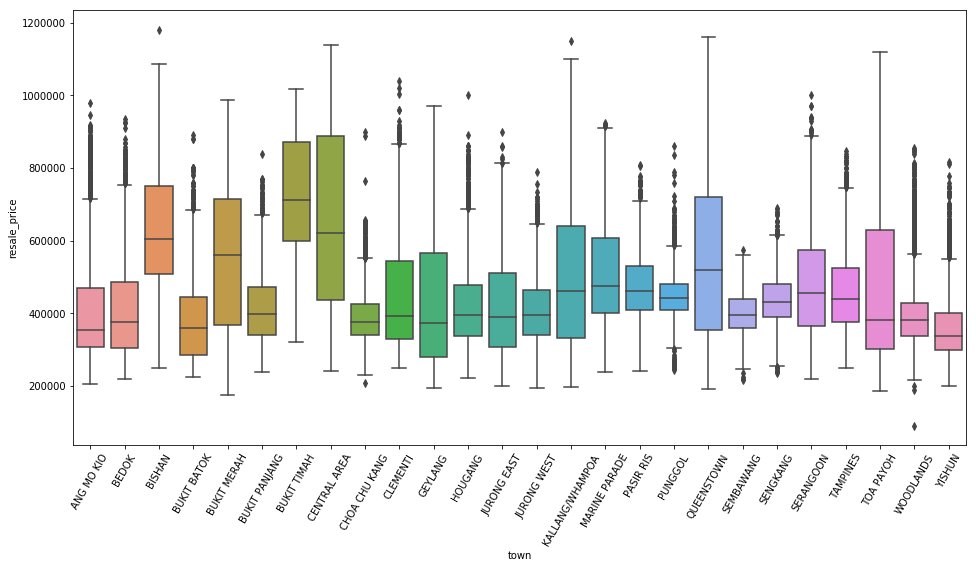

In [17]:
plt.figure(figsize=(16,8))
g = sns.boxplot(hdb["town"], hdb["resale_price"])
g.set_xticklabels(g.get_xticklabels(), rotation=60)
plt.show()

### 12. Using pd.get_dummies, lets add Town into the model as well

In [18]:
town_dummies = pd.get_dummies(hdb.town, prefix='TOWN')
hdb_town = pd.concat([hdb, town_dummies], axis=1)
factors = list(town_dummies.columns) + ["upper_storey_bound", "floor_area_sqm", "remaining_lease"]

In [19]:
y = hdb_town["resale_price"]
X = hdb_town[factors]
model3 = LinearRegression().fit(X, y)

In [20]:
print(model3.intercept_)
print(dict(zip(factors,model3.coef_)))

-282341.62424685486
{'TOWN_ANG MO KIO': 31263.39993539918, 'TOWN_BEDOK': 8896.321912991258, 'TOWN_BISHAN': 117003.89405524885, 'TOWN_BUKIT BATOK': -54965.967949640086, 'TOWN_BUKIT MERAH': 118884.44856333456, 'TOWN_BUKIT PANJANG': -117591.14821367081, 'TOWN_BUKIT TIMAH': 211312.16150097453, 'TOWN_CENTRAL AREA': 188395.75735186998, 'TOWN_CHOA CHU KANG': -157409.57305311406, 'TOWN_CLEMENTI': 64686.50211291403, 'TOWN_GEYLANG': 53201.052138110244, 'TOWN_HOUGANG': -57208.72963550202, 'TOWN_JURONG EAST': -30919.825212797146, 'TOWN_JURONG WEST': -101247.9314866132, 'TOWN_KALLANG/WHAMPOA': 80399.731089154, 'TOWN_MARINE PARADE': 172814.38405234469, 'TOWN_PASIR RIS': -105516.78036884678, 'TOWN_PUNGGOL': -112743.46228436832, 'TOWN_QUEENSTOWN': 133140.25789074306, 'TOWN_SEMBAWANG': -161245.18414056275, 'TOWN_SENGKANG': -119584.55480577162, 'TOWN_SERANGOON': 16660.16376931021, 'TOWN_TAMPINES': -32207.07908146429, 'TOWN_TOA PAYOH': 69477.95181597772, 'TOWN_WOODLANDS': -139572.2615414114, 'TOWN_YISHUN

### 13. Use this updated model to predict the prices of new BTO flats

In [21]:
new_release = pd.DataFrame({'upper_storey_bound': [12, 5], 'floor_area_sqm': [100, 120], 'remaining_lease': [80, 85],
                          'town': ['ANG MO KIO', 'SENGKANG']})

In [22]:
new_release_town = pd.get_dummies(new_release, prefix="TOWN")
new_release_town = new_release_town.reindex(columns = factors, fill_value=0)

In [23]:
model3.predict(new_release_town)

array([558425.74374072, 480653.3547931 ])